<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/CMD_ensemble_lenet_64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nruns = 10
model = 'lenet'
image_size = 64

In [3]:
!nvidia-smi

Tue Sep  6 13:08:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    22W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.10-py3-none-any.whl size=15992 sha256=c557673759db0e207746dae766e1a0314a55ed756eb0df475e52a2d9c853c833
  Stored in directory: /root/.cache/pip/wheels/33/b2/9d/97c264f6addbd178fe1c8ff119617e1515cb8c0d0f220605cf
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [6]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 632, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 632 (delta 66), reused 27 (delta 11), pack-reused 531
Receiving objects: 100% (632/632), 1.15 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (447/447), done.


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189.4 MB 17 kB/s 
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.14+cuda11.cudnn805
    Uninstalling jaxlib-0.3.14+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.14+cuda11.cudnn805
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590 kB 15.2 MB/s 
  Created wheel for jax: filename=jax-0.2.12-py3-none-any.whl size=682487 sha256=19b080654cf043a18b00290fab292aa7c5b95f44195359a5e89f5674c04b257d
  Stored in directory: /root/.cache/pip/wheels/f6/4d/e5/73eec5070b77f25664c67bd793d4eb97f41bbf9be7afafd15e
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [8]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [9]:
for i in range(nruns):
 base_cmd = ['python3', 'bnn_hmc/scripts/run_sgd.py', '--seed=%s' % i, '--weight_decay=10', '--dir=runs/sgd/cmd/%s/' % i, 
 '--dataset_name=cmd', '--model_name=%s' % model, '--scaling=asinh', 
 '--init_step_size=1e-7', '--num_epochs=50', '--save_freq=5',
 '--builder_kwargs={"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}',
 '--image_size=%s' % image_size, '--eval_freq=5', '--batch_size=100', '--optimizer=SGD']
 train_cmd = base_cmd + ['--train_split=train[:90%]', '--test_split=train[90%:95%]']
 eval_cmd = base_cmd + ['--eval_split=train[95%:]']
 print(' '.join(train_cmd))
 p = subprocess.run(train_cmd, capture_output=True)
 print(p.stdout.decode('utf8'))
 p = subprocess.run(eval_cmd, capture_output=True)
 print(p.stdout.decode('utf8'))

python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/cmd/0/ --dataset_name=cmd --model_name=lenet --scaling=asinh --init_step_size=1e-7 --num_epochs=50 --save_freq=5 --builder_kwargs={"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]} --image_size=64 --eval_freq=5 --batch_size=100 --optimizer=SGD --train_split=train[:90%] --test_split=train[90%:95%]
JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Dataset cmd downloaded and prepared to /root/tensorflow_datasets/IllustrisTNG_Mtot_omegam/cmd/1.0.3. Subsequent calls will reuse this data.
Starting from random initialization with provided seed
---  --------  ------------  -----------  -----------  ----------  ---------------  --------------  --------
  i         t    train/rmse    train/nll    test/rmse    test/nll  test/ens_rmse    test/ens_nll          lr
---  --------  ---------

In [17]:
base_cmd = ['python3', 'bnn_hmc/scripts/run_sgd.py', '--seed=%s' % 0, '--weight_decay=10', '--dir=runs/sgd/cmd/%s/' % 0, 
 '--dataset_name=cmd', '--model_name=%s' % model, '--scaling=asinh', 
 '--init_step_size=1e-7', '--num_epochs=50', '--save_freq=5',
 '--builder_kwargs={"simulation": "IllustrisTNG", "field": "Mtot", "parameters": ["omegam"]}',
 '--image_size=%s' % image_size, '--eval_freq=5', '--batch_size=100', '--optimizer=SGD']
eval_cmd = base_cmd + ['--eval_split=train[95%:]', '--ensemble_root=/content/runs/sgd/cmd/*/*', 
                       '--ensemble_exclude_metric=nll']
p = subprocess.run(eval_cmd, capture_output=True)
print(p.stdout.decode('utf8'))

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Continuing the run from the last saved checkpoint
{'scaled_nll': -1.166463017463684, 'scaled_mse': 0.004650565329939127, 'scaled_rmse': 0.06819505355917779, 'nll': -1.166463017463684, 'mse': 0.004650565329939127, 'rmse': 0.06819505355917779}



In [19]:
predictions = []
errors = []
for i, root in enumerate(glob.glob('/content/runs/sgd/cmd/*/*/')):
  metrics = np.load(root + '/metrics.npy', allow_pickle=True)
  if not np.isfinite(metrics.item()['nll']) or metrics.item()['nll'] > 1:
    # Do not include any runs which have diverged
    continue
  data = np.load(root + '/test_set.npy')  
  prediction = np.load(root + '/predictions.npy')
  predictions.append(prediction[0,:,0])
  errors.append(prediction[0,:,1])
  print(metrics)
predictions = np.array(predictions)
errors = np.array(errors)

{'scaled_nll': array(-0.93356687, dtype=float32), 'scaled_mse': array(0.0036796, dtype=float32), 'scaled_rmse': 0.060659703, 'nll': array(-0.93356687, dtype=float32), 'mse': array(0.0036796, dtype=float32), 'rmse': 0.060659703}
{'scaled_nll': array(-1.6036507, dtype=float32), 'scaled_mse': array(0.00272211, dtype=float32), 'scaled_rmse': 0.052173827, 'nll': array(-1.6036507, dtype=float32), 'mse': array(0.00272211, dtype=float32), 'rmse': 0.052173827}
{'scaled_nll': array(-0.71924806, dtype=float32), 'scaled_mse': array(0.01388026, dtype=float32), 'scaled_rmse': 0.11781453, 'nll': array(-0.71924806, dtype=float32), 'mse': array(0.01388026, dtype=float32), 'rmse': 0.11781453}
{'scaled_nll': array(-0.7192814, dtype=float32), 'scaled_mse': array(0.01387941, dtype=float32), 'scaled_rmse': 0.11781092, 'nll': array(-0.7192814, dtype=float32), 'mse': array(0.01387941, dtype=float32), 'rmse': 0.11781092}
{'scaled_nll': array(-0.71912694, dtype=float32), 'scaled_mse': array(0.01388314, dtype=fl

In [20]:
mean_predictions = np.mean(predictions, axis=0)
mean_errors = np.mean(errors, axis=0)
total_errors = (mean_errors**2 + np.std(predictions, axis=0)**2)**0.5
diffs = mean_predictions - data[0,:,0]

In [21]:
print('Ensemble MSE', np.mean(diffs**2))
print('Ensemble MAE', np.mean(np.abs(diffs)))

Ensemble MSE 0.004650565
Ensemble MAE 0.058233146


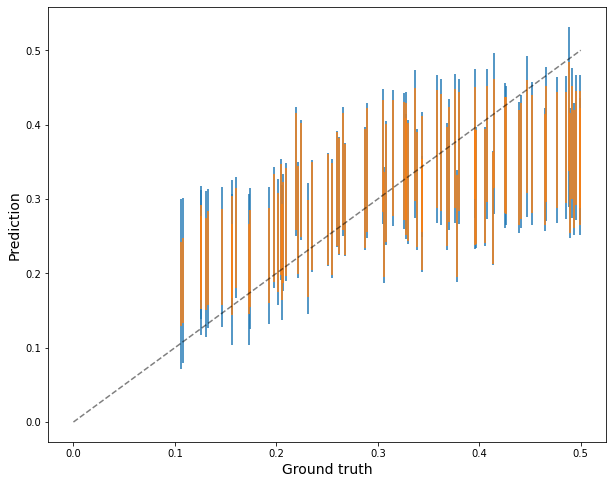

In [22]:
plt.figure(figsize=(10,8))
plt.errorbar(data[0,::10,0], mean_predictions[::10], total_errors[::10],  ls='none')
plt.errorbar(data[0,::10,0], mean_predictions[::10], mean_errors[::10],  ls='none')
plt.plot(np.linspace(0,0.5,10), np.linspace(0,0.5,10), linestyle='--', color='black', alpha=0.5)
plt.xlabel('Ground truth', fontsize=14)
plt.ylabel('Prediction', fontsize=14)
plt.show()